## Compare Los Angeles and San Francisco City Cultures

#### Import Packages and Download Postcodes and Location Data

In [1]:
!pip install pandas
!pip install numpy
!pip install scipy 
!pip install scikit-learn

!pip install matplotlib

!pip install simpy.io
!pip install requests

!pip install geopy
!pip install folium

In [2]:
# data analsysis

import numpy as np 
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#import json # JSON files manipulation
#import requests # HTTP library
#from bs4 import BeautifulSoup # scraping library

# clustering algorithm
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.metrics import pairwise_distances

# plotting 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# map rendering 

import folium 
from geopy.geocoders import Nominatim

import io
import requests

print('Libraries imported.')

Libraries imported.


In [3]:
data_us = pd.read_csv('uszips.csv')
data_us.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,601,18.1800,-66.7522,Adjuntas,PR,Puerto Rico,True,NaN,18570,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",False,False,America/Puerto_Rico
1,602,18.3607,-67.1752,Aguada,PR,Puerto Rico,True,NaN,41520,523.7,72003,Aguada,{'72003':100},False,False,America/Puerto_Rico
2,603,18.4544,-67.1220,Aguadilla,PR,Puerto Rico,True,NaN,54689,667.9,72005,Aguadilla,{'72005':100},False,False,America/Puerto_Rico
3,606,18.1672,-66.9383,Maricao,PR,Puerto Rico,True,NaN,6615,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",False,False,America/Puerto_Rico
4,610,18.2903,-67.1224,Anasco,PR,Puerto Rico,True,NaN,29016,311.9,72011,Añasco,"{'72003':0.55,'72011':99.45}",False,False,America/Puerto_Rico


In [4]:
data_us = data_us[['zip','lat','lng','city','state_id']]
data_us.head()

,zip,lat,lng,city,state_id
0,601,18.1800,-66.7522,Adjuntas,PR
1,602,18.3607,-67.1752,Aguada,PR
2,603,18.4544,-67.1220,Aguadilla,PR
3,606,18.1672,-66.9383,Maricao,PR
4,610,18.2903,-67.1224,Anasco,PR


In [5]:
data_sea = data_us[(data_us['city'] == 'Los Angeles') & (data_us['state_id'] == 'CA')]
data_sea.head()

,zip,lat,lng,city,state_id
29993,90001,33.9740,-118.2495,Los Angeles,CA
29994,90002,33.9491,-118.2467,Los Angeles,CA
29995,90003,33.9641,-118.2737,Los Angeles,CA
29996,90004,34.0762,-118.3108,Los Angeles,CA
29997,90005,34.0591,-118.3064,Los Angeles,CA


In [6]:
data_sea.rename(columns={"zip":"Postcode", "lat": "Latitude", "lng":"Longitude", "city": "City"}, inplace = True)
data_sea.drop(['state_id'], axis = 1, inplace = True)
data_sea.head()

/Users/ruihe/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/ruihe/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Postcode,Latitude,Longitude,City
29993,90001,33.9740,-118.2495,Los Angeles
29994,90002,33.9491,-118.2467,Los Angeles
29995,90003,33.9641,-118.2737,Los Angeles
29996,90004,34.0762,-118.3108,Los Angeles
29997,90005,34.0591,-118.3064,Los Angeles


In [7]:
data_port = data_us[(data_us['city'] == 'San Francisco') & (data_us['state_id'] == 'CA')]


data_port

,zip,lat,lng,city,state_id
30959,94102,37.7797,-122.4193,San Francisco,CA
30960,94103,37.7732,-122.4111,San Francisco,CA
30961,94104,37.7915,-122.4021,San Francisco,CA
30962,94105,37.7897,-122.3939,San Francisco,CA
30963,94107,37.7666,-122.3948,San Francisco,CA
30964,94108,37.7920,-122.4086,San Francisco,CA
30965,94109,37.7952,-122.4222,San Francisco,CA
30966,94110,37.7500,-122.4154,San Francisco,CA
30967,94111,37.7989,-122.3983,San Francisco,CA
30968,94112,37.7204,-122.4429,San Francisco,CA


In [8]:
data_port.rename(columns={"zip":"Postcode", "lat": "Latitude", "lng":"Longitude", "city": "City"}, inplace = True)
data_port.drop(['state_id'], axis = 1, inplace = True)
data_port.head()

,Postcode,Latitude,Longitude,City
30959,94102,37.7797,-122.4193,San Francisco
30960,94103,37.7732,-122.4111,San Francisco
30961,94104,37.7915,-122.4021,San Francisco
30962,94105,37.7897,-122.3939,San Francisco
30963,94107,37.7666,-122.3948,San Francisco


In [96]:
print('Los Angeles has ', data_sea.shape[0], 'zipcode areas')
print('San Francisco has ', data_port.shape[0], 'zipcode areas')

Los Angeles has  65 zipcode areas
San Francisco has  28 zipcode areas


#### Creating Maps for Los Angeles and San Francisco Postcode Areas

In [10]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_sea = location.latitude
longitude_sea = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude_sea, longitude_sea))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [11]:
# create map of Los Angeles using latitude and longitude values
map_sea = folium.Map(location=[latitude_sea, longitude_sea], zoom_start=10)

# add markers to map
for lat, lng, postcode in zip(data_sea['Latitude'], data_sea['Longitude'], data_sea['Postcode']):
    label = '{}'.format(postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sea)  
    
map_sea

In [98]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_port = location.latitude
longitude_port = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude_port, longitude_port))

The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.


In [13]:
# create map of San Francisco using latitude and longitude values
map_port = folium.Map(location=[latitude_port, longitude_port], zoom_start=10)

# add markers to map
for lat, lng, postcode in zip(data_port['Latitude'], data_port['Longitude'], data_port['Postcode']):
    label = '{}'.format(postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_port)  
    
map_port

#### Obtaining the Venue Information for Both Cities

In [14]:
# Define Foursquare Credentials and Version

#CLIENT_ID = '4JZQHBUQUTMHZC0CYXGFNHS5OCMHVVW3UB31LVWXJFL0JSIJ' # Foursquare ID
#CLIENT_SECRET = 'R13O0XDBKL0QUL1QZDY021QCSYXQHEZPDWRWZCJUBZZ55M1H' # Foursquare Secret

CLIENT_ID = 'BDMDABXRZBQ2XFZ5ZWJMF0PARADVM0OEIXU5CINQW2TL5QEQ' # Foursquare ID
CLIENT_SECRET = 'JEFQ1I2AT1SSRQGXFA0UMZPKMU43OYUZMAYKOBNIGPF0VVKN' # Foursquare Secret
VERSION = '20190623' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BDMDABXRZBQ2XFZ5ZWJMF0PARADVM0OEIXU5CINQW2TL5QEQ
CLIENT_SECRET:JEFQ1I2AT1SSRQGXFA0UMZPKMU43OYUZMAYKOBNIGPF0VVKN


In [15]:
# Create a function to explore all the neighborhoods
radius = 1000
LIMIT =100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [16]:
sea_venues = getNearbyVenues(names=data_sea['Postcode'],
                                   latitudes=data_sea['Latitude'],
                                   longitudes=data_sea['Longitude'])

port_venues = getNearbyVenues(names=data_port['Postcode'],
                                   latitudes=data_port['Latitude'],
                                   longitudes=data_port['Longitude'])


In [17]:
sea_venues.shape

(1593, 7)

In [18]:
port_venues.shape

(1604, 7)

In [21]:
# one hot encoding
sea_onehot = pd.get_dummies(sea_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sea_onehot['Postcode'] = sea_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [sea_onehot.columns[-1]] + list(sea_onehot.columns[:-1])
sea_onehot = sea_onehot[fixed_columns]

sea_onehot.shape

(1593, 246)

In [22]:
# one hot encoding
port_onehot = pd.get_dummies(port_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
port_onehot['Postcode'] = port_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [port_onehot.columns[-1]] + list(port_onehot.columns[:-1])
port_onehot = port_onehot[fixed_columns]

port_onehot.shape

(1604, 270)

In [23]:
sea_grouped = sea_onehot.groupby('Postcode').mean().reset_index()
sea_grouped.head()

,Postcode,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Cafeteria,College Rec Center,College Residence Hall,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donburi Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,90001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.08

In [24]:
port_grouped = port_onehot.groupby('Postcode').mean().reset_index()
port_grouped.head()

,Postcode,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Library,Light Rail Station,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Roof Deck,Rugby Pitch,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tour Provider,Toy / Game Store,Trail,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,94102,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.010000,0.000000,0.0,0.0,0.000000,0.01,0.0,0.01,0.000000,0.0,0.000000,0.0,0.0,0.020000,0.00,0.010000,0

In [25]:
sea_grouped.shape

(65, 246)

In [26]:
port_grouped.shape

(28, 270)

In [27]:
num_top_venues = 10

for hood in sea_grouped['Postcode']:
    print("----"+ str(hood) +"----")
    temp = sea_grouped[sea_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----90001----
                     venue  freq
0       Mexican Restaurant  0.17
1             Burger Joint  0.08
2        Mobile Phone Shop  0.08
3               Shoe Store  0.08
4  Fruit & Vegetable Store  0.08
5              Pizza Place  0.08
6     Fast Food Restaurant  0.08
7               Donut Shop  0.08
8            Grocery Store  0.08
9           Sandwich Place  0.08


----90002----
                           venue  freq
0                           Park   0.5
1                  Women's Store   0.5
2  Paper / Office Supplies Store   0.0
3                    Music Store   0.0
4                    Music Venue   0.0
5                   Neighborhood   0.0
6        New American Restaurant   0.0
7                      Nightclub   0.0
8                     Non-Profit   0.0
9                   Noodle House   0.0


----90003----
                             venue  freq
0             Fast Food Restaurant  0.25
1                       Taco Place  0.25
2  Southern / Soul Food Restaurant  0.2

                     venue  freq
0                    Trail  0.50
1       Athletics & Sports  0.25
2                     Park  0.25
3             Noodle House  0.00
4        Outdoor Sculpture  0.00
5          Organic Grocery  0.00
6             Optical Shop  0.00
7                   Office  0.00
8  North Indian Restaurant  0.00
9                      ATM  0.00


----90028----
                 venue  freq
0               Lounge  0.07
1          Coffee Shop  0.07
2   Mexican Restaurant  0.06
3                Hotel  0.05
4            Nightclub  0.04
5                  Bar  0.04
6         Cocktail Bar  0.03
7  American Restaurant  0.03
8         Burger Joint  0.03
9          Salad Place  0.03


----90029----
                  venue  freq
0           Coffee Shop  0.12
1           Pizza Place  0.12
2      Asian Restaurant  0.08
3     Convenience Store  0.08
4  Fast Food Restaurant  0.08
5                Bakery  0.08
6              Bus Line  0.04
7        Sandwich Place  0.04
8        Breakfa

                 venue  freq
0       Clothing Store  0.13
1         Intersection  0.04
2          Coffee Shop  0.04
3      Thai Restaurant  0.04
4        Grocery Store  0.04
5            Cafeteria  0.04
6  Fried Chicken Joint  0.04
7          Snack Place  0.04
8           Food Truck  0.04
9   Mexican Restaurant  0.04


----90058----
                           venue  freq
0                 Sandwich Place   0.5
1                  Grocery Store   0.5
2                            ATM   0.0
3  Paper / Office Supplies Store   0.0
4                    Music Venue   0.0
5                   Neighborhood   0.0
6        New American Restaurant   0.0
7                      Nightclub   0.0
8                     Non-Profit   0.0
9                   Noodle House   0.0


----90059----
                venue  freq
0  Mexican Restaurant  0.44
1         Video Store  0.11
2        Burger Joint  0.11
3                Park  0.11
4         Gas Station  0.11
5         Fish Market  0.11
6                 ATM  0

In [28]:

for hood in port_grouped['Postcode']:
    print("----"+ str(hood) +"----")
    temp = port_grouped[port_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----94102----
                    venue  freq
0            Cocktail Bar  0.04
1             Coffee Shop  0.04
2                    Café  0.04
3         Thai Restaurant  0.03
4   Vietnamese Restaurant  0.03
5       French Restaurant  0.03
6  Furniture / Home Store  0.03
7                Beer Bar  0.03
8   Performing Arts Venue  0.03
9                 Theater  0.03


----94103----
             venue  freq
0        Nightclub  0.07
1          Gay Bar  0.06
2     Cocktail Bar  0.06
3       Food Truck  0.04
4             Café  0.04
5      Coffee Shop  0.04
6              Bar  0.03
7  Motorcycle Shop  0.03
8      Art Gallery  0.03
9  Thai Restaurant  0.03


----94104----
                     venue  freq
0              Coffee Shop  0.08
1           Sandwich Place  0.06
2                      Gym  0.04
3      Japanese Restaurant  0.03
4                     Café  0.03
5               Food Truck  0.03
6  New American Restaurant  0.02
7             Cocktail Bar  0.02
8       Dim Sum Restaurant  0.

               venue  freq
0               Park   0.4
1              Trail   0.2
2             Garden   0.2
3     Baseball Field   0.2
4       Noodle House   0.0
5  Outdoor Sculpture   0.0
6       Optical Shop   0.0
7        Opera House   0.0
8             Office   0.0
9          Nightclub   0.0


----94158----
                   venue  freq
0             Food Truck  0.14
1            Coffee Shop  0.08
2               Pharmacy  0.05
3  Street Food Gathering  0.05
4                   Park  0.05
5        Harbor / Marina  0.05
6           Soccer Field  0.03
7     Basketball Stadium  0.03
8              Mini Golf  0.03
9             Taco Place  0.03




#### Clustering of the Postcode Areas for Both Cities

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


In [31]:
# create a new dataframe
sea_venues_sorted = pd.DataFrame(columns=columns)
sea_venues_sorted['Postcode'] = sea_grouped['Postcode']

for ind in np.arange(sea_grouped.shape[0]):
    sea_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sea_grouped.iloc[ind, :], num_top_venues)

sea_venues_sorted.head()

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,90001,Mexican Restaurant,Shoe Store,Fruit & Vegetable Store,Fast Food Restaurant,Burger Joint,Pizza Place,Mobile Phone Shop,Donut Shop,Pharmacy,Sandwich Place
1,90002,Women's Store,Park,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
2,90003,Southern / Soul Food Restaurant,Taco Place,Bakery,Fast Food Restaurant,Yoga Studio,Fabric Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop
3,90004,Korean Restaurant,Coffee Shop,Bar,Intersection,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Sandwich Place,Sushi Restaurant,Beer Garden
4,90005,Korean Restaurant,Japanese Restaurant,Coffee Shop,Café,Yoga Studio,Beer Bar,Juice Bar,Gift Shop,Mexican Restaurant,Noodle House


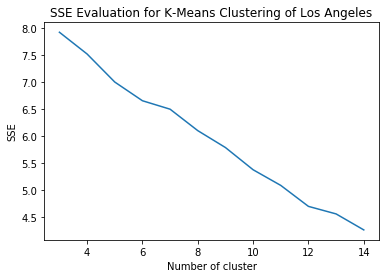

In [32]:
sea_grouped_clustering = sea_grouped.drop('Postcode', 1)

# run k-means clustering
K = 15
SSE = []
for k in range(3, K):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=1000).fit(sea_grouped_clustering)
    SSE.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(range(3, K)), SSE)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('SSE Evaluation for K-Means Clustering of Los Angeles')
plt.show()

In [81]:
kclusters_sea = 6

kmeans = KMeans(n_clusters=kclusters_sea, random_state=0, max_iter=1000).fit(sea_grouped_clustering)

sea_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#sea_venues_sorted['Cluster Labels'] = kmeans.labels_
sea_venues_sorted


,Cluster Labels,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,90001,Mexican Restaurant,Shoe Store,Fruit & Vegetable Store,Fast Food Restaurant,Burger Joint,Pizza Place,Mobile Phone Shop,Donut Shop,Pharmacy,Sandwich Place
1,4,90002,Women's Store,Park,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
2,1,90003,Southern / Soul Food Restaurant,Taco Place,Bakery,Fast Food Restaurant,Yoga Studio,Fabric Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop
3,1,90004,Korean Restaurant,Coffee Shop,Bar,Intersection,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Sandwich Place,Sushi Restaurant,Beer Garden
4,1,90005,Korean Restaurant,Japanese Restaurant,Coffee Shop,Café,Yoga Studio,Beer Bar,Juice Bar,Gift Shop,Mexican Restaurant,Noodle House
5,1,90006,Donut Shop,Cosmetics Shop,Video Game Store,Grocery Store,Food Truck,Diner,Pizza Place,Sandwich Place,Bus Station,Spa
6,1,90007,Coffee Shop,Shipping Store,Yoga Studio,Food Truck,Caribbean Restaurant,College Residence Hall,Farmers Market,Food Court,Fraternity House,Big Box Store
7,2,90008,Scenic Lookout,Clothing Store,Yoga Studio,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food
8,1,90010,Coffee Shop,Korean Restaurant,Japanese Restaurant,Pizza Place,Business Service,Sake Bar,Italian Restaurant,Asian Restaurant,Sandwich Place,Fast Food Restaurant
9,0,90011,Fast Food Restaurant,Mexican Restaurant,Ice Cream Shop,Fried Chicken Joint,Pizza Place,Discount Store,Food,Filipino Restaurant,Fish Market,Flea Market


In [82]:
sea_merged = data_sea

# merge sea_grouped with sea_data to add latitude/longitude for each neighborhood
sea_merged = sea_merged.join(sea_venues_sorted.set_index('Postcode'), on='Postcode')

sea_merged.shape
sea_merged.head()

,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29993,90001,33.9740,-118.2495,Los Angeles,0,Mexican Restaurant,Shoe Store,Fruit & Vegetable Store,Fast Food Restaurant,Burger Joint,Pizza Place,Mobile Phone Shop,Donut Shop,Pharmacy,Sandwich Place
29994,90002,33.9491,-118.2467,Los Angeles,4,Women's Store,Park,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
29995,90003,33.9641,-118.2737,Los Angeles,1,Southern / Soul Food Restaurant,Taco Place,Bakery,Fast Food Restaurant,Yoga Studio,Fabric Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop
29996,90004,34.0762,-118.3108,Los Angeles,1,Korean Restaurant,Coffee Shop,Bar,Intersection,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Sandwich Place,Sushi Restaurant,Beer Garden
29997,90005,34.0591,-118.3064,Los Angeles,1,Korean Restaurant,Japanese Restaurant,Coffee Shop,Café,Yoga Studio,Beer Bar,Juice Bar,Gift Shop,Mexican Restaurant,Noodle House


In [83]:
sea_merged.dropna(inplace = True)
sea_merged

,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29993,90001,33.9740,-118.2495,Los Angeles,0,Mexican Restaurant,Shoe Store,Fruit & Vegetable Store,Fast Food Restaurant,Burger Joint,Pizza Place,Mobile Phone Shop,Donut Shop,Pharmacy,Sandwich Place
29994,90002,33.9491,-118.2467,Los Angeles,4,Women's Store,Park,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
29995,90003,33.9641,-118.2737,Los Angeles,1,Southern / Soul Food Restaurant,Taco Place,Bakery,Fast Food Restaurant,Yoga Studio,Fabric Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop
29996,90004,34.0762,-118.3108,Los Angeles,1,Korean Restaurant,Coffee Shop,Bar,Intersection,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Sandwich Place,Sushi Restaurant,Beer Garden
29997,90005,34.0591,-118.3064,Los Angeles,1,Korean Restaurant,Japanese Restaurant,Coffee Shop,Café,Yoga Studio,Beer Bar,Juice Bar,Gift Shop,Mexican Restaurant,Noodle House
29998,90006,34.0480,-118.2942,Los Angeles,1,Donut Shop,Cosmetics Shop,Video Game Store,Grocery Store,Food Truck,Diner,Pizza Place,Sandwich Place,Bus Station,Spa
29999,90007,34.0281,-118.2849,Los Angeles,1,Coffee Shop,Shipping Store,Yoga Studio,Food Truck,Caribbean Restaurant,College Residence Hall,Farmers Market,Food Court,Fraternity House,Big Box Store
30000,90008,34.0096,-118.3471,Los Angeles,2,Scenic Lookout,Clothing Store,Yoga Studio,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food
30001,90010,34.0621,-118.3162,Los Angeles,1,Coffee Shop,Korean Restaurant,Japanese Restaurant,Pizza Place,Business Service,Sake Bar,Italian Restaurant,Asian Restaurant,Sandwich Place,Fast Food Restaurant
30002,90011,34.0071,-118.2587,Los Angeles,0,Fast Food Restaurant,Mexican Restaurant,Ice Cream Shop,Fried Chicken Joint,Pizza Place,Discount Store,Food,Filipino Restaurant,Fish Market,Flea Market


In [84]:
# create map
map_clusters = folium.Map(location=[latitude_sea, longitude_sea], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_sea)
ys = [i + x + (i*x)**2 for i in range(kclusters_sea)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sea_merged['Latitude'], sea_merged['Longitude'], sea_merged['Postcode'], sea_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [90]:
sea_merged.loc[sea_merged['Cluster Labels'] == 0, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29993,33.9740,Mexican Restaurant,Shoe Store,Fruit & Vegetable Store,Fast Food Restaurant,Burger Joint,Pizza Place,Mobile Phone Shop,Donut Shop,Pharmacy,Sandwich Place
30002,34.0071,Fast Food Restaurant,Mexican Restaurant,Ice Cream Shop,Fried Chicken Joint,Pizza Place,Discount Store,Food,Filipino Restaurant,Fish Market,Flea Market
30013,34.0245,Mexican Restaurant,Shoe Store,Mobile Phone Shop,Convenience Store,Pizza Place,Bank,Donut Shop,Flower Shop,Filipino Restaurant,Fish Market
30014,34.0228,Mexican Restaurant,Video Game Store,Fast Food Restaurant,Grocery Store,Sandwich Place,Discount Store,Seafood Restaurant,Department Store,Pizza Place,Food
30023,34.0510,Mexican Restaurant,Pizza Place,American Restaurant,Thai Restaurant,Pharmacy,Sandwich Place,Seafood Restaurant,Fast Food Restaurant,Taco Place,Yoga Studio
30024,34.0307,Pizza Place,Coffee Shop,Mexican Restaurant,Shipping Store,Sandwich Place,Grocery Store,Sushi Restaurant,Chinese Restaurant,Pharmacy,Snack Place
30042,34.0024,Grocery Store,Sandwich Place,Yoga Studio,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
30043,33.9263,Mexican Restaurant,Burger Joint,Fish Market,Park,Gas Station,Video Store,Yoga Studio,Flower Shop,Filipino Restaurant,Flea Market
30044,33.9204,Fast Food Restaurant,Convenience Store,Park,Yoga Studio,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop


In [91]:
sea_merged.loc[sea_merged['Cluster Labels'] == 1, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29995,33.9641,Southern / Soul Food Restaurant,Taco Place,Bakery,Fast Food Restaurant,Yoga Studio,Fabric Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop
29996,34.0762,Korean Restaurant,Coffee Shop,Bar,Intersection,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Sandwich Place,Sushi Restaurant,Beer Garden
29997,34.0591,Korean Restaurant,Japanese Restaurant,Coffee Shop,Café,Yoga Studio,Beer Bar,Juice Bar,Gift Shop,Mexican Restaurant,Noodle House
29998,34.0480,Donut Shop,Cosmetics Shop,Video Game Store,Grocery Store,Food Truck,Diner,Pizza Place,Sandwich Place,Bus Station,Spa
29999,34.0281,Coffee Shop,Shipping Store,Yoga Studio,Food Truck,Caribbean Restaurant,College Residence Hall,Farmers Market,Food Court,Fraternity House,Big Box Store
30001,34.0621,Coffee Shop,Korean Restaurant,Japanese Restaurant,Pizza Place,Business Service,Sake Bar,Italian Restaurant,Asian Restaurant,Sandwich Place,Fast Food Restaurant
30003,34.0660,Chinese Restaurant,Bakery,Vietnamese Restaurant,Bar,Intersection,Diner,Recreation Center,Café,Monument / Landmark,French Restaurant
30004,34.0448,Japanese Restaurant,Sushi Restaurant,Ice Cream Shop,Bubble Tea Shop,Gift Shop,Cocktail Bar,Brewery,Bakery,Ramen Restaurant,Karaoke Bar
30005,34.0431,Bar,Coffee Shop,Music Venue,Theater,Italian Restaurant,Burger Joint,Hotel,Clothing Store,Lounge,Food Court
30006,34.0394,Coffee Shop,Mexican Restaurant,Bar,Food Truck,Sports Bar,American Restaurant,Basketball Court,Music Store,Cocktail Bar,Snack Place


In [92]:
sea_merged.loc[sea_merged['Cluster Labels'] == 2, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30000,34.0096,Scenic Lookout,Clothing Store,Yoga Studio,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food


In [40]:
sea_merged.loc[sea_merged['Cluster Labels'] == 3, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29995,33.9641,Southern / Soul Food Restaurant,Taco Place,Bakery,Fast Food Restaurant,Yoga Studio,Fabric Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop
30007,34.0287,Dance Studio,Deli / Bodega,Check Cashing Service,Wine Bar,Fast Food Restaurant,Fried Chicken Joint,Mexican Restaurant,Latin American Restaurant,Sandwich Place,Performing Arts Venue
30009,34.0289,Home Service,Park,Burger Joint,Skate Park,Market,Grocery Store,Mobile Phone Shop,Fried Chicken Joint,Bakery,Fish Market
30015,34.0657,Residential Building (Apartment / Condo),Bus Station,Paper / Office Supplies Store,Yoga Studio,Fabric Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food
30018,34.1252,Trail,Athletics & Sports,Park,Yoga Studio,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Fabric Shop
30021,34.0802,Trail,Music Venue,Mexican Restaurant,Gym / Fitness Center,Food & Drink Shop,Yoga Studio,Flea Market,Fast Food Restaurant,Filipino Restaurant,Fish Market
30036,34.1075,Grocery Store,Italian Restaurant,Café,Bike Rental / Bike Share,Yoga Studio,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop
30037,33.9545,Grocery Store,Park,Discount Store,Pool,Seafood Restaurant,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
30040,33.9881,Intersection,Baseball Field,Bus Station,Fast Food Restaurant,Gym / Fitness Center,American Restaurant,Dim Sum Restaurant,Football Stadium,Food Truck,Department Store
30046,34.0451,Pharmacy,Taco Place,Check Cashing Service,Bookstore,Park,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Yoga Studio


In [93]:
sea_merged.loc[sea_merged['Cluster Labels'] == 4, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]


,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29994,33.9491,Women's Store,Park,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
30029,34.1118,Park,Yoga Studio,Fabric Shop,Football Stadium,Food Truck,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
30051,34.1283,Park,Dessert Shop,Scenic Lookout,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop


In [42]:
sea_merged.loc[sea_merged['Cluster Labels'] == 5, sea_merged.columns[[1] + list(range(5, sea_merged.shape[1]))]]



,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29996,34.0762,Korean Restaurant,Coffee Shop,Bar,Intersection,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Sandwich Place,Sushi Restaurant,Beer Garden
29997,34.0591,Korean Restaurant,Japanese Restaurant,Coffee Shop,Café,Yoga Studio,Beer Bar,Juice Bar,Gift Shop,Mexican Restaurant,Noodle House
29999,34.0281,Coffee Shop,Shipping Store,Yoga Studio,Food Truck,Caribbean Restaurant,College Residence Hall,Farmers Market,Food Court,Fraternity House,Big Box Store
30001,34.0621,Coffee Shop,Korean Restaurant,Japanese Restaurant,Pizza Place,Business Service,Sake Bar,Italian Restaurant,Asian Restaurant,Sandwich Place,Fast Food Restaurant
30004,34.0448,Japanese Restaurant,Sushi Restaurant,Ice Cream Shop,Bubble Tea Shop,Gift Shop,Cocktail Bar,Brewery,Bakery,Ramen Restaurant,Karaoke Bar
30005,34.0431,Bar,Coffee Shop,Music Venue,Theater,Italian Restaurant,Burger Joint,Hotel,Clothing Store,Lounge,Food Court
30006,34.0394,Coffee Shop,Mexican Restaurant,Bar,Food Truck,Sports Bar,American Restaurant,Basketball Court,Music Store,Cocktail Bar,Snack Place
30008,34.0529,Coffee Shop,Café,Sandwich Place,Motel,Mexican Restaurant,Clothing Store,Steakhouse,Thai Restaurant,Rental Car Location,Grocery Store
30011,34.0664,Korean Restaurant,Dessert Shop,Café,Ice Cream Shop,Bakery,Asian Restaurant,Shopping Mall,Sushi Restaurant,Brazilian Restaurant,Movie Theater
30012,34.0293,Marijuana Dispensary,Grocery Store,Asian Restaurant,Food Stand,Mexican Restaurant,Coffee Shop,Farmers Market,Restaurant,Burger Joint,Convenience Store


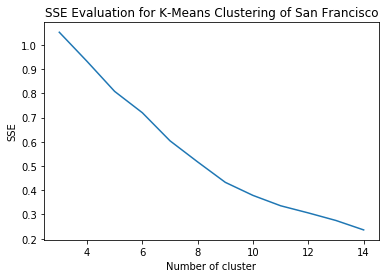

In [97]:
port_grouped_clustering = port_grouped.drop('Postcode', 1)

# run k-means clustering

SSE = []
for k in range(3, K):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=1000).fit(port_grouped_clustering)
    SSE.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(range(3, K)), SSE)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('SSE Evaluation for K-Means Clustering of San Francisco')
plt.show()

In [59]:
kclusters_port = 8

kmeans = KMeans(n_clusters=kclusters_port, random_state=0, max_iter=1000).fit(port_grouped_clustering)
labels = kmeans.labels_
len(labels)

28

In [61]:
port_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#port_venues_sorted['Cluster Labels'] = labels
port_venues_sorted

,Cluster Labels,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,94102,Cocktail Bar,Café,Coffee Shop,French Restaurant,Beer Bar,Vietnamese Restaurant,Furniture / Home Store,Thai Restaurant,Theater,Performing Arts Venue
1,1,94103,Nightclub,Gay Bar,Cocktail Bar,Food Truck,Café,Coffee Shop,Thai Restaurant,Art Gallery,Bar,Motorcycle Shop
2,1,94104,Coffee Shop,Sandwich Place,Gym,Café,Food Truck,Japanese Restaurant,Bar,Cocktail Bar,Seafood Restaurant,New American Restaurant
3,1,94105,Coffee Shop,Sandwich Place,Café,Gym,American Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Salad Place,Cocktail Bar
4,1,94107,Café,Park,Coffee Shop,American Restaurant,French Restaurant,Mac & Cheese Joint,Sushi Restaurant,Mediterranean Restaurant,Bookstore,Bubble Tea Shop
5,1,94108,Coffee Shop,Hotel,Spa,Café,Cocktail Bar,Gym,French Restaurant,Sushi Restaurant,Tea Room,Church
6,1,94109,Italian Restaurant,Deli / Bodega,Gym / Fitness Center,Spa,Wine Bar,Bar,Sushi Restaurant,Cosmetics Shop,French Restaurant,Massage Studio
7,6,94110,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Gym / Fitness Center,Cocktail Bar,Deli / Bodega,Latin American Restaurant,Art Gallery,Dessert Shop
8,1,94111,Food Truck,Japanese Restaurant,Café,Sandwich Place,Cosmetics Shop,Park,Bar,New American Restaurant,Street Food Gathering,Pier
9,6,94112,Pizza Place,Sandwich Place,Mexican Restaurant,Vietnamese Restaurant,Bus Station,Light Rail Station,Gas Station,Liquor Store,Steakhouse,Men's Store


In [62]:
port_merged = data_port

# merge sea_grouped with sea_data to add latitude/longitude for each neighborhood
port_merged = port_merged.join(port_venues_sorted.set_index('Postcode'), on='Postcode')

port_merged.shape
port_merged



,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30959,94102,37.7797,-122.4193,San Francisco,1,Cocktail Bar,Café,Coffee Shop,French Restaurant,Beer Bar,Vietnamese Restaurant,Furniture / Home Store,Thai Restaurant,Theater,Performing Arts Venue
30960,94103,37.7732,-122.4111,San Francisco,1,Nightclub,Gay Bar,Cocktail Bar,Food Truck,Café,Coffee Shop,Thai Restaurant,Art Gallery,Bar,Motorcycle Shop
30961,94104,37.7915,-122.4021,San Francisco,1,Coffee Shop,Sandwich Place,Gym,Café,Food Truck,Japanese Restaurant,Bar,Cocktail Bar,Seafood Restaurant,New American Restaurant
30962,94105,37.7897,-122.3939,San Francisco,1,Coffee Shop,Sandwich Place,Café,Gym,American Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Salad Place,Cocktail Bar
30963,94107,37.7666,-122.3948,San Francisco,1,Café,Park,Coffee Shop,American Restaurant,French Restaurant,Mac & Cheese Joint,Sushi Restaurant,Mediterranean Restaurant,Bookstore,Bubble Tea Shop
30964,94108,37.7920,-122.4086,San Francisco,1,Coffee Shop,Hotel,Spa,Café,Cocktail Bar,Gym,French Restaurant,Sushi Restaurant,Tea Room,Church
30965,94109,37.7952,-122.4222,San Francisco,1,Italian Restaurant,Deli / Bodega,Gym / Fitness Center,Spa,Wine Bar,Bar,Sushi Restaurant,Cosmetics Shop,French Restaurant,Massage Studio
30966,94110,37.7500,-122.4154,San Francisco,6,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Gym / Fitness Center,Cocktail Bar,Deli / Bodega,Latin American Restaurant,Art Gallery,Dessert Shop
30967,94111,37.7989,-122.3983,San Francisco,1,Food Truck,Japanese Restaurant,Café,Sandwich Place,Cosmetics Shop,Park,Bar,New American Restaurant,Street Food Gathering,Pier
30968,94112,37.7204,-122.4429,San Francisco,6,Pizza Place,Sandwich Place,Mexican Restaurant,Vietnamese Restaurant,Bus Station,Light Rail Station,Gas Station,Liquor Store,Steakhouse,Men's Store


In [63]:
port_merged.dropna(inplace = True)
port_merged

,Postcode,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30959,94102,37.7797,-122.4193,San Francisco,1,Cocktail Bar,Café,Coffee Shop,French Restaurant,Beer Bar,Vietnamese Restaurant,Furniture / Home Store,Thai Restaurant,Theater,Performing Arts Venue
30960,94103,37.7732,-122.4111,San Francisco,1,Nightclub,Gay Bar,Cocktail Bar,Food Truck,Café,Coffee Shop,Thai Restaurant,Art Gallery,Bar,Motorcycle Shop
30961,94104,37.7915,-122.4021,San Francisco,1,Coffee Shop,Sandwich Place,Gym,Café,Food Truck,Japanese Restaurant,Bar,Cocktail Bar,Seafood Restaurant,New American Restaurant
30962,94105,37.7897,-122.3939,San Francisco,1,Coffee Shop,Sandwich Place,Café,Gym,American Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Salad Place,Cocktail Bar
30963,94107,37.7666,-122.3948,San Francisco,1,Café,Park,Coffee Shop,American Restaurant,French Restaurant,Mac & Cheese Joint,Sushi Restaurant,Mediterranean Restaurant,Bookstore,Bubble Tea Shop
30964,94108,37.7920,-122.4086,San Francisco,1,Coffee Shop,Hotel,Spa,Café,Cocktail Bar,Gym,French Restaurant,Sushi Restaurant,Tea Room,Church
30965,94109,37.7952,-122.4222,San Francisco,1,Italian Restaurant,Deli / Bodega,Gym / Fitness Center,Spa,Wine Bar,Bar,Sushi Restaurant,Cosmetics Shop,French Restaurant,Massage Studio
30966,94110,37.7500,-122.4154,San Francisco,6,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Gym / Fitness Center,Cocktail Bar,Deli / Bodega,Latin American Restaurant,Art Gallery,Dessert Shop
30967,94111,37.7989,-122.3983,San Francisco,1,Food Truck,Japanese Restaurant,Café,Sandwich Place,Cosmetics Shop,Park,Bar,New American Restaurant,Street Food Gathering,Pier
30968,94112,37.7204,-122.4429,San Francisco,6,Pizza Place,Sandwich Place,Mexican Restaurant,Vietnamese Restaurant,Bus Station,Light Rail Station,Gas Station,Liquor Store,Steakhouse,Men's Store


In [64]:
# create map
map_clusters = folium.Map(location=[latitude_port, longitude_port], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_port)
ys = [i + x + (i*x)**2 for i in range(kclusters_port)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(port_merged['Latitude'], port_merged['Longitude'], port_merged['Postcode'], port_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [73]:
port_merged.loc[port_merged['Cluster Labels'] == 0, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30977,37.7309,Gym,Bus Station,Brewery,Art Gallery,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Yoga Studio


In [66]:
port_merged.loc[port_merged['Cluster Labels'] == 1, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30959,37.7797,Cocktail Bar,Café,Coffee Shop,French Restaurant,Beer Bar,Vietnamese Restaurant,Furniture / Home Store,Thai Restaurant,Theater,Performing Arts Venue
30960,37.7732,Nightclub,Gay Bar,Cocktail Bar,Food Truck,Café,Coffee Shop,Thai Restaurant,Art Gallery,Bar,Motorcycle Shop
30961,37.7915,Coffee Shop,Sandwich Place,Gym,Café,Food Truck,Japanese Restaurant,Bar,Cocktail Bar,Seafood Restaurant,New American Restaurant
30962,37.7897,Coffee Shop,Sandwich Place,Café,Gym,American Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Salad Place,Cocktail Bar
30963,37.7666,Café,Park,Coffee Shop,American Restaurant,French Restaurant,Mac & Cheese Joint,Sushi Restaurant,Mediterranean Restaurant,Bookstore,Bubble Tea Shop
30964,37.7920,Coffee Shop,Hotel,Spa,Café,Cocktail Bar,Gym,French Restaurant,Sushi Restaurant,Tea Room,Church
30965,37.7952,Italian Restaurant,Deli / Bodega,Gym / Fitness Center,Spa,Wine Bar,Bar,Sushi Restaurant,Cosmetics Shop,French Restaurant,Massage Studio
30967,37.7989,Food Truck,Japanese Restaurant,Café,Sandwich Place,Cosmetics Shop,Park,Bar,New American Restaurant,Street Food Gathering,Pier
30976,37.8005,Italian Restaurant,French Restaurant,Wine Bar,Sushi Restaurant,Cosmetics Shop,Motel,Spa,American Restaurant,Salad Place,Gym / Fitness Center
30979,37.6221,Exhibit,Airport Lounge,Airport Service,Public Art,Café,Coffee Shop,Spa,Soup Place,Sandwich Place,Pizza Place


In [74]:
port_merged.loc[port_merged['Cluster Labels'] == 2, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30978,37.7357,Gun Range,Park,Trail,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Yoga Studio


In [75]:
port_merged.loc[port_merged['Cluster Labels'] == 3, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30981,37.8204,Music Venue,Harbor / Marina,Island,Rugby Pitch,Bus Station,Grocery Store,Flea Market,History Museum,Brewery,Dry Cleaner


In [76]:
port_merged.loc[port_merged['Cluster Labels'] == 4, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30985,37.7194,Park,Baseball Field,Garden,Trail,Food Court,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Yoga Studio


In [77]:
port_merged.loc[port_merged['Cluster Labels'] == 5, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30980,37.7975,Trail,Playground,Park,Café,Golf Course,National Park,Yoga Studio,Flower Shop,Filipino Restaurant,Fish Market


In [72]:
port_merged.loc[port_merged['Cluster Labels'] == 6, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30966,37.7500,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Gym / Fitness Center,Cocktail Bar,Deli / Bodega,Latin American Restaurant,Art Gallery,Dessert Shop
30968,37.7204,Pizza Place,Sandwich Place,Mexican Restaurant,Vietnamese Restaurant,Bus Station,Light Rail Station,Gas Station,Liquor Store,Steakhouse,Men's Store
30969,37.7580,Gay Bar,Coffee Shop,Scenic Lookout,Clothing Store,Plaza,Playground,Pet Store,Intersection,Thai Restaurant,Deli / Bodega
30970,37.7860,Cosmetics Shop,Spa,Bakery,Yoga Studio,Boutique,Ice Cream Shop,Café,Pizza Place,Park,New American Restaurant
30971,37.7446,Chinese Restaurant,Café,Japanese Restaurant,Sandwich Place,Dance Studio,Dumpling Restaurant,Light Rail Station,Kids Store,Shoe Repair,Pizza Place
30972,37.7697,Boutique,Clothing Store,Coffee Shop,Café,Thrift / Vintage Store,Shoe Store,Pizza Place,Gift Shop,Bookstore,Thai Restaurant
30973,37.7801,Japanese Restaurant,Bakery,Sushi Restaurant,Thai Restaurant,Pizza Place,Vietnamese Restaurant,Massage Studio,Breakfast Spot,Burmese Restaurant,Korean Restaurant
30974,37.7765,Café,Vietnamese Restaurant,Chinese Restaurant,Bus Station,Japanese Restaurant,Bakery,Sandwich Place,Bus Stop,Pizza Place,Dessert Shop
30975,37.7588,Chinese Restaurant,Gym / Fitness Center,Bus Station,Light Rail Station,Shoe Store,Café,Coffee Shop,Gymnastics Gym,Playground,Pet Store
30982,37.7455,Bus Station,Playground,Scenic Lookout,Theater,Park,Bus Line,Grocery Store,Salon / Barbershop,Shipping Store,Bus Stop


In [78]:
port_merged.loc[port_merged['Cluster Labels'] == 7, port_merged.columns[[1] + list(range(5, port_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30983,37.7221,Pizza Place,Café,Sandwich Place,Snack Place,College Cafeteria,Tennis Court,Sushi Restaurant,Yoga Studio,Flower Shop,Filipino Restaurant
